# Top 10 Studio Competitors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data/bom.movie_gross.csv.gz')

## Cleaning Process 

We want to see a summary of the NaNs in each column. I see that foreign_gross has an obscene number of NaNs so I'm just going to remove it (rip) making sure I set inplace=True so that the change sticks.

In [2]:
df.isna().sum()
df.dropna(inplace=True)
df.drop(['foreign_gross'], axis=1, inplace=True)

My next step is to conver the year to a datetime object. We have chosen to limit the dataset to 5 years (2013 - 2018) so after we convert year to a datetime object we can filter for all years greater than or equal to 2013.

In [3]:
# we need to convert the year column to a string so we can then convert it to a datetime object
df.year = df.year.astype('str')

# convert to datetime 
df['year'] =  pd.to_datetime(df['year'], infer_datetime_format=True)

# filter out values with values before 01-01-13 and after 12-31-18
df = df[(df['year'].dt.year >= 2013)]

In [4]:
# groupby studio
df = df.groupby('studio').sum().reset_index()
# sort values largest to smallest
df = df.sort_values('domestic_gross', ascending=False)
# reset the index bc it got messed up
df = df.reset_index()
# limit to 10 largest values 
df = df[0:10]

# top 10 = Buena Vista; Universal;; Fox; Warner Brothers; Sony; Paramount; Warner Brothers Netherlands; LF/S?????; Lions Gate Film; The Weinstein Company

## Plotting

Text(0.5, 1.0, 'Top 10 Studio Competitors')

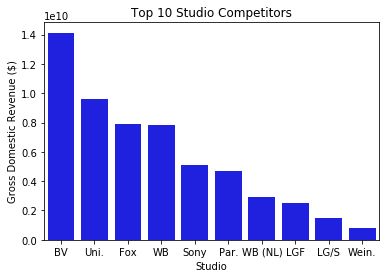

In [5]:
ax = sns.barplot(x="studio", y="domestic_gross", data=df, color="b")
plt.xlabel('Studio')
plt.ylabel('Gross Domestic Revenue ($)') # highest value is $14,000,000,000
plt.title('Top 10 Studio Competitors')
#sns.color_palette(palette="BuGn_r", n_colors=None, desat=None)
#sns.palplot(sns.color_palette())

## To Do:
 - set color palette for graph
 - change x labels
 - think abut units for revenue??